# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file='test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

#Create Validation Set
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print('{} Images Successfully Loaded'.format(len(X_train)+len(X_validation)+len(X_test)))

dictionary = {\
              0:"Speed limit (20km/h)",\
              1:"Speed limit (30km/h)",\
              2:"Speed limit (50km/h)",\
              3:"Speed limit (60km/h)",\
              4:"Speed limit (70km/h)",\
              5:"Speed limit (80km/h)",\
              6:"End of speed limit (80km/h)",\
              7:"Speed limit (100km/h)",\
              8:"Speed limit (120km/h)",\
              9:"No passing",\
              10:"No passing for vehicles over 3.5 metric tons",\
              11:"Right-of-way at the next intersection",\
              12:"Priority road",\
              13:"Yield",\
              14:"Stop",\
              15:"No vehicles",\
              16:"Vehicles over 3.5 metric tons prohibited",\
              17:"No entry",\
              18:"General caution",\
              19:"Dangerous curve to the left",\
              20:"Dangerous curve to the right",\
              21:"Double curve",\
              22:"Bumpy road",\
              23:"Slippery road",\
              24:"Road narrows on the right",\
              25:"Road work",\
              26:"Traffic signals",\
              27:"Pedestrians",\
              28:"Children crossing",\
              29:"Bicycles crossing",\
              30:"Beware of ice/snow",\
              31:"Wild animals crossing",\
              32:"End of all speed and passing limits",\
              33:"Turn right ahead",\
              34:"Turn left ahead",\
              35:"Ahead only",\
              36:"Go straight or right",\
              37:"Go straight or left",\
              38:"Keep right",\
              39:"Keep left",\
              40:"Roundabout mandatory",\
              41:"End of no passing",\
              42:"End of no passing by vehicles over 3.5 metric tons"\
             }

class_id = dictionary.keys()
labels = dictionary.values()

47429 Images Successfully Loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 27839
Number of testing examples = 12630
Number of validation examples = 6960
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

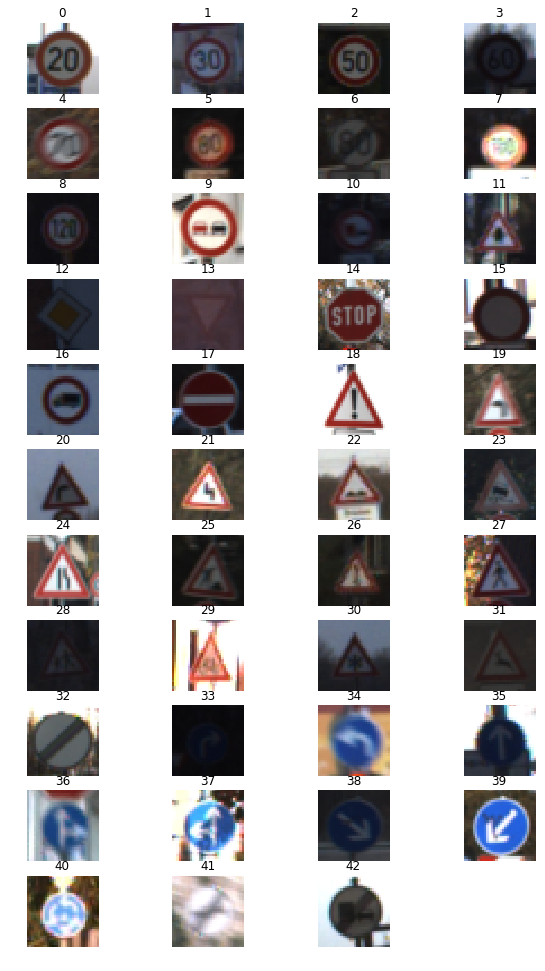

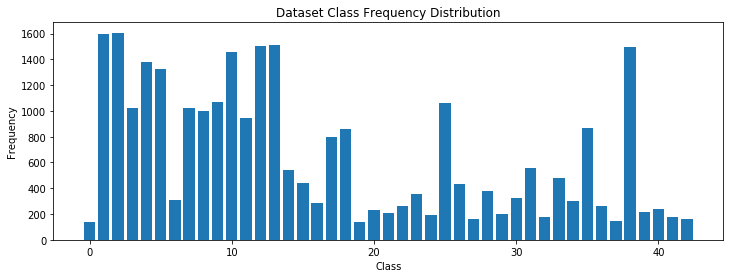

The maximum and minimum number of images per class is 1607 and 141, respectively


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

#Display a random image from each class
n_samples=[]
plt.figure(figsize=(10, 17))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[random.randint(0, len(x_selected)-1), :, :, :])
    plt.title(i)
    plt.axis('off')
    n_samples.append(len(x_selected))
plt.show()

#Plot frequency distribution of images
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), n_samples)
plt.title("Dataset Class Frequency Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

max_frequency = max(n_samples)
min_frequency = min(n_samples)
print ("The maximum and minimum number of images per class is {} and {}, respectively".format(max_frequency, min_frequency))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Processing Denoise Operations...
18%
36%
54%
72%
90%
100%
Performing Micro-Rotation Operations...
Micro-Rotation Operations Completed...
Micro-Rotation Operations Completed...
Micro-Rotation Operations Completed...
Micro-Rotation Operations Completed...


C:\Users\Eliseo\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


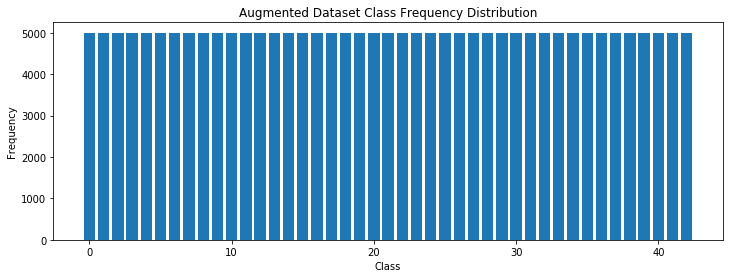

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from sklearn import preprocessing
from skimage.restoration import denoise_tv_chambolle
from scipy import ndimage
import cv2

def denoise(X,y):
    '''This function will apply a median filter to smooth out each image
    This provides another reference for the classifier to train on'''
    X_denoised = []
    y_denoised = []
    cnt = 0
    total = 0
    print('Processing Denoise Operations...')
    for img, cid in zip(X,y):
        X_denoised.append(ndimage.median_filter(img, 3))
        y_denoised.append(cid)
        cnt+=1
        if cnt==5000:
            total += cnt
            print("{:.0f}%".format((total/len(y))*100))
            cnt = 0
    print("100%")
    
    return np.asarray(X_denoised), np.asarray(y_denoised)

def micro_rotations(X,y):
    '''This function applys small random rotations to each input image
    The theory behind this is that each image should remain invariant in terms of appearance
    but applying micro rotations gives the classifier a differnent viewpoint with which to train
    the image.
    
    This function also equalizes the dataset by applying micro-rotations only if the number of images per class
    is below a threshold (5000 images per class). This provides a much strong, augmented data set for the classifier
    to train on.'''
    
    rotated = []
    y_rotated = []

    for image,cid in zip(X,y):
        if n_samples[cid] < 5000:
            (h, w) = image.shape[:2]
            center = (w / 2, h / 2)
            # rotate the image by a random small amount
            M = cv2.getRotationMatrix2D(center, random.uniform(-5., 5.), 1.0)
            rotated.append(cv2.warpAffine(image, M, (w, h)))
            n_samples[cid]+=1
            y_rotated.append(cid)
            
    print("Micro-Rotation Operations Completed...")
            
    return np.asarray(rotated),np.asarray(y_rotated)

def augment(X1,X2,y1,y2):
    '''This function simply concatenates two lists of images together in order to 
    augment the  data set'''
#The original image dataset and all additional transformed arrays should be
#passed to this function to join them together, creating an augmented dataset
    augmented_X = np.concatenate((X1,X2))
    augmented_y = np.concatenate((y1,y2))
    
    return augmented_X, augmented_y  

def preprocess(X,y):
    '''This function executes the preprocessing of the dataset by converting the images to grayscale,
    normalizing the data, and reshaping for the LeNet architecture'''
    
    #Convert to grayscale
    X_gray = [] 
    for image in X:
        im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        im = preprocessing.scale(im) #normalize image with mean 0 unit stddev
        img = im.reshape(32,32,1)
        X_gray.append(img)
    
    #Shuffle data
    X_gray, y = shuffle(X_gray, y)
    
    return X_gray,y

rotated_X = []
rotated_y = []
num_rotations = 4

X_denoised, y_denoised = denoise(X_train,y_train)
X_train, y_train = augment(X_train, X_denoised, y_train, y_denoised)

print("Performing Micro-Rotation Operations...")
for i in range(num_rotations): #Perform the microrotations on all images'num_amount' of times
    rX, ry = micro_rotations(X_train,y_train)
    rotated_X.extend(rX)
    rotated_y.extend(ry)
    X_train,y_train = augment(X_train, rotated_X, y_train, rotated_y)
    
X_train, y_train = preprocess(X_train, y_train) #convert the entire, augmented dataset into grayscale and normalize
X_validation, y_validation = preprocess(X_validation, y_validation)
X_test, y_test = preprocess(X_test, y_test)

#L2 NORMALIZATION IS UTILIZED IN THIS MODEL WITH TENSORFLOW'S BUILT IN FUNCTION
#THIS IS IMPLEMENTED BELOW AFTER THE PLACEHOLDER IS CREATED AS THE FUNCTION...
#ONLY WORKS WITH TENSORS AS INPUT

#Plot the augmented dataset frequency distribution
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), n_samples)
plt.title("Augmented Dataset Class Frequency Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

### Model Architecture

In [7]:
import tensorflow as tf

EPOCHS = 25
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    F_W1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 1, 6], mean=mu, stddev=sigma))
    F_b1 = tf.Variable(tf.zeros([6]))
    conv_1 = tf.nn.conv2d(x, F_W1, strides=[1,1,1,1], padding='VALID') + F_b1
    # TODO: Activation.
    conv_1 = tf.nn.relu(conv_1)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_1 = tf.nn.max_pool(conv_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    F_W2 = tf.Variable(tf.truncated_normal(shape=[5,5,6,16], mean=mu, stddev=sigma))
    F_b2 = tf.Variable(tf.zeros([16]))
    conv_2 = tf.nn.conv2d(conv_1, F_W2, strides=[1,1,1,1], padding='VALID') + F_b2
    # TODO: Activation.
    conv_2 = tf.nn.relu(conv_2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_2 = tf.nn.max_pool(conv_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(conv_2)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=[400,120], mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros([120]))
    fc1 = tf.matmul(flat, fc1_W)+fc1_b
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=[120,84], mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros([84]))
    fc2 = tf.matmul(fc1, fc2_W)+fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W = tf.Variable(tf.truncated_normal(shape=[84,n_classes], mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros([n_classes]))
    logits = tf.matmul(fc2, fc3_W)+fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, n_classes)
x = tf.nn.l2_normalize(x, dim=2, epsilon=0.001) #Apply L2 Normalization

rate = 0.001
logits= LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.55})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.985

EPOCH 2 ...
Validation Accuracy = 0.989

EPOCH 3 ...
Validation Accuracy = 0.988

EPOCH 4 ...
Validation Accuracy = 0.990

EPOCH 5 ...
Validation Accuracy = 0.989

EPOCH 6 ...
Validation Accuracy = 0.990

EPOCH 7 ...
Validation Accuracy = 0.992

EPOCH 8 ...
Validation Accuracy = 0.990

EPOCH 9 ...
Validation Accuracy = 0.991

EPOCH 10 ...
Validation Accuracy = 0.988

EPOCH 11 ...
Validation Accuracy = 0.993

EPOCH 12 ...
Validation Accuracy = 0.991

EPOCH 13 ...
Validation Accuracy = 0.992

EPOCH 14 ...
Validation Accuracy = 0.990

EPOCH 15 ...
Validation Accuracy = 0.991

EPOCH 16 ...
Validation Accuracy = 0.991

EPOCH 17 ...
Validation Accuracy = 0.991

EPOCH 18 ...
Validation Accuracy = 0.989

EPOCH 19 ...
Validation Accuracy = 0.992

EPOCH 20 ...
Validation Accuracy = 0.992

EPOCH 21 ...
Validation Accuracy = 0.991

EPOCH 22 ...
Validation Accuracy = 0.991

EPOCH 23 ...
Validation Accuracy = 0.988

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

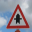

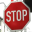

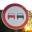

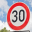

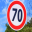

C:\Users\Eliseo\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [10]:
import os
from IPython.display import display, Image

#LOAD IMAGES FROM FOLDER
img = [cv2.imread('right_of_way.png'), cv2.imread('stop.png'), cv2.imread('no_passing.png'), cv2.imread('30kph.png'), cv2.imread('70kph.png')]
cnt = 0
names = []

#RESIZE AND WRITE PROCESSED IMAGES TO DISK
for n in img:
    img[cnt] = cv2.resize(n,(32, 32), interpolation = cv2.INTER_AREA)
    names.append("image"+str(cnt)+".png")
    cv2.imwrite(names[cnt], img[cnt])
    cnt+=1
    
#DISPLAY IMAGES
for name in names:
    display(Image(name, width=75))
    
#ASSIGN CLASS-ID TO EACH IMAGE AND PREPARE DATA FOR INPUT INTO CLASSIFIER
X_manual1, y_manual1 = np.array([img[0],img[1], img[2], img[3], img[4]]),[11,14,9,1,4]
X_manual, y_manual = preprocess(X_manual1, y_manual1)


### Predict the Sign Type for Each Image

In [11]:
prediction_prob = tf.argmax(logits, 1)
prediction_class = tf.nn.softmax(logits)
top5_preds = tf.nn.top_k(prediction_class, 5)
saver = tf.train.Saver()


with tf.Session() as sess:
    saver.restore(sess, './lenet')
    predictions, p_class, top5= sess.run([prediction_prob, prediction_class, top5_preds], feed_dict={x: X_manual, keep_prob: 1.})

print('Predictions: ', predictions)

Predictions:  [ 1 11  9 14  4]


### Analyze Performance

The Classifier predicted 5 out of 5 images correctly for a 100.0% accuracy


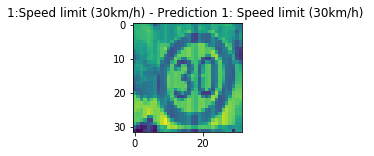

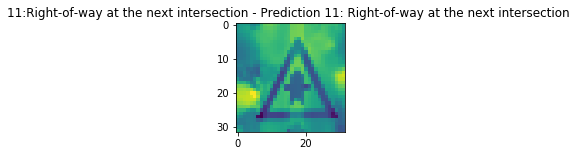

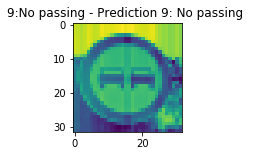

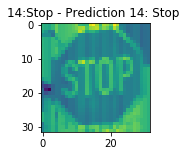

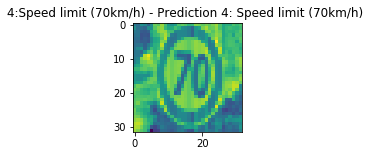

In [12]:
common = set(predictions).intersection(y_manual)
accuracy = len(common)/len(predictions)

for n, cid, prd in zip(range(len(X_manual1)), y_manual, predictions):
    plt.figure(figsize=(2,2))
    plt.title("{}:{} - Prediction {}: {} ".format(cid, dictionary[cid], prd, dictionary[prd]))
    image = X_manual[n].reshape(32,32)
    plt.imshow(image)

print("The Classifier predicted {} out of {} images correctly for a {}% accuracy".format(len(common), len(predictions), accuracy*100))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [14]:
print("The top 5 classes predicted by the classifier for each image are:")
print()
cid = top5.indices
confidence = top5.values

for c, up in zip(y_manual, range(len(y_manual))):
    for i, n in zip(cid, range(len(X_manual))):
        perc = confidence[up]*100
        print("Actual Sign={} - Softmax Prob={} (w/ {:.1f}% confidence)".format(dictionary[c],dictionary[cid[up][n]], perc[n]))
    print()

The top 5 classes predicted by the classifier for each image are:

Actual Sign=Speed limit (30km/h) - Softmax Prob=Speed limit (30km/h) (w/ 100.0% confidence)
Actual Sign=Speed limit (30km/h) - Softmax Prob=Roundabout mandatory (w/ 0.0% confidence)
Actual Sign=Speed limit (30km/h) - Softmax Prob=Keep right (w/ 0.0% confidence)
Actual Sign=Speed limit (30km/h) - Softmax Prob=Speed limit (50km/h) (w/ 0.0% confidence)
Actual Sign=Speed limit (30km/h) - Softmax Prob=Speed limit (120km/h) (w/ 0.0% confidence)

Actual Sign=Right-of-way at the next intersection - Softmax Prob=Right-of-way at the next intersection (w/ 100.0% confidence)
Actual Sign=Right-of-way at the next intersection - Softmax Prob=Speed limit (20km/h) (w/ 0.0% confidence)
Actual Sign=Right-of-way at the next intersection - Softmax Prob=Speed limit (30km/h) (w/ 0.0% confidence)
Actual Sign=Right-of-way at the next intersection - Softmax Prob=Speed limit (50km/h) (w/ 0.0% confidence)
Actual Sign=Right-of-way at the next inter

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [13]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")